In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',None)

In [2]:
#load two processed files 

bb = pd.read_csv('billboard_dataset/processed/billboard_cleaned.csv')
af = pd.read_csv('billboard_dataset/processed/audio_features_merged.csv')

In [3]:
print(bb.shape)
print(af.shape)

(327895, 9)
(29383, 23)


In [4]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29383 entries, 0 to 29382
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   song_id                    29383 non-null  object 
 1   performer                  29383 non-null  object 
 2   song                       29383 non-null  object 
 3   spotify_genre              25232 non-null  object 
 4   spotify_track_duration_ms  24286 non-null  float64
 5   spotify_track_explicit     24286 non-null  object 
 6   spotify_track_album        24280 non-null  object 
 7   danceability               24224 non-null  float64
 8   energy                     24224 non-null  float64
 9   key                        24224 non-null  float64
 10  loudness                   24224 non-null  float64
 11  mode                       24224 non-null  float64
 12  speechiness                24224 non-null  float64
 13  acousticness               24224 non-null  flo

In [5]:
#confirm uniqueness of song_id column

def is_unique(df,col):
    total_count = len(df[col])
    unique_count = df[col].nunique()
    return total_count == unique_count
    
is_unique(af,'song_id')  

True

In [6]:
#convert spotify_track_explicit to type bool

af['spotify_track_explicit'] = af['spotify_track_explicit'].astype(bool)

In [7]:
af.head()

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart
0,Solid RockGoanna,Goanna,Solid Rock,"[""australian children's music"", ""children's music""]",275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,-7.388,0.0,0.0476,0.006990,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7
1,Burning HeartVandenberg,Vandenberg,Burning Heart,"[""australian children's music""]",250693.0,False,Vandenberg,0.438,0.546,11.0,-10.331,1.0,0.0419,0.127000,0.00000,0.1820,0.486,125.221,4.0,44.0,39,1983-04-09,14
2,Junk Food JunkieLarry Groce,Larry Groce,Junk Food Junkie,"[""children's music"", 'nursery']",196346.0,False,Junk Food Junkie,0.440,0.655,4.0,-8.424,1.0,0.4320,0.627000,0.00000,0.6070,0.899,205.187,4.0,20.0,9,1976-04-17,15
3,Bad DayAlvin And The Chipmunks,Alvin And The Chipmunks,Bad Day,"[""children's music""]",214666.0,False,Alvin And The Chipmunks (Original Motion Picture Soundtrack),0.692,0.663,9.0,-3.955,1.0,0.0290,0.176000,0.14200,0.1710,0.315,139.995,4.0,35.0,67,2008-01-19,2
4,FunkytownAlvin And The Chipmunks,Alvin And The Chipmunks,Funkytown,"[""children's music""]",214053.0,False,Alvin And The Chipmunks (Original Motion Picture Soundtrack),0.807,0.742,0.0,-7.013,1.0,0.0563,0.000802,0.92900,0.0812,0.285,123.037,4.0,29.0,86,2008-01-19,2


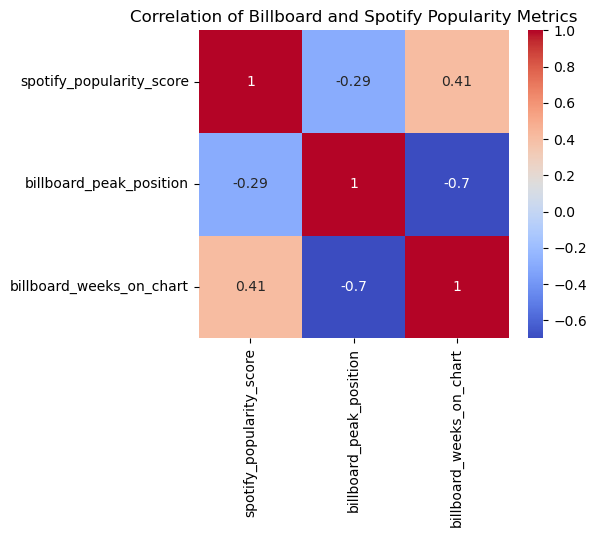

In [8]:
#correlation matrix 1: correlation b/w Spotify and Billboard Popularity

af_corr1 = af[['spotify_track_popularity','peak_position','weeks_on_chart']].copy()

#rename columns
af_corr1.rename(columns={
    'spotify_track_popularity': 'spotify_popularity_score',
    'peak_position': 'billboard_peak_position',
    'weeks_on_chart': 'billboard_weeks_on_chart'
    
}, inplace=True)

corr1 = af_corr1.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr1,annot=True,cmap='coolwarm')
plt.title('Correlation of Billboard and Spotify Popularity Metrics')

plt.show()

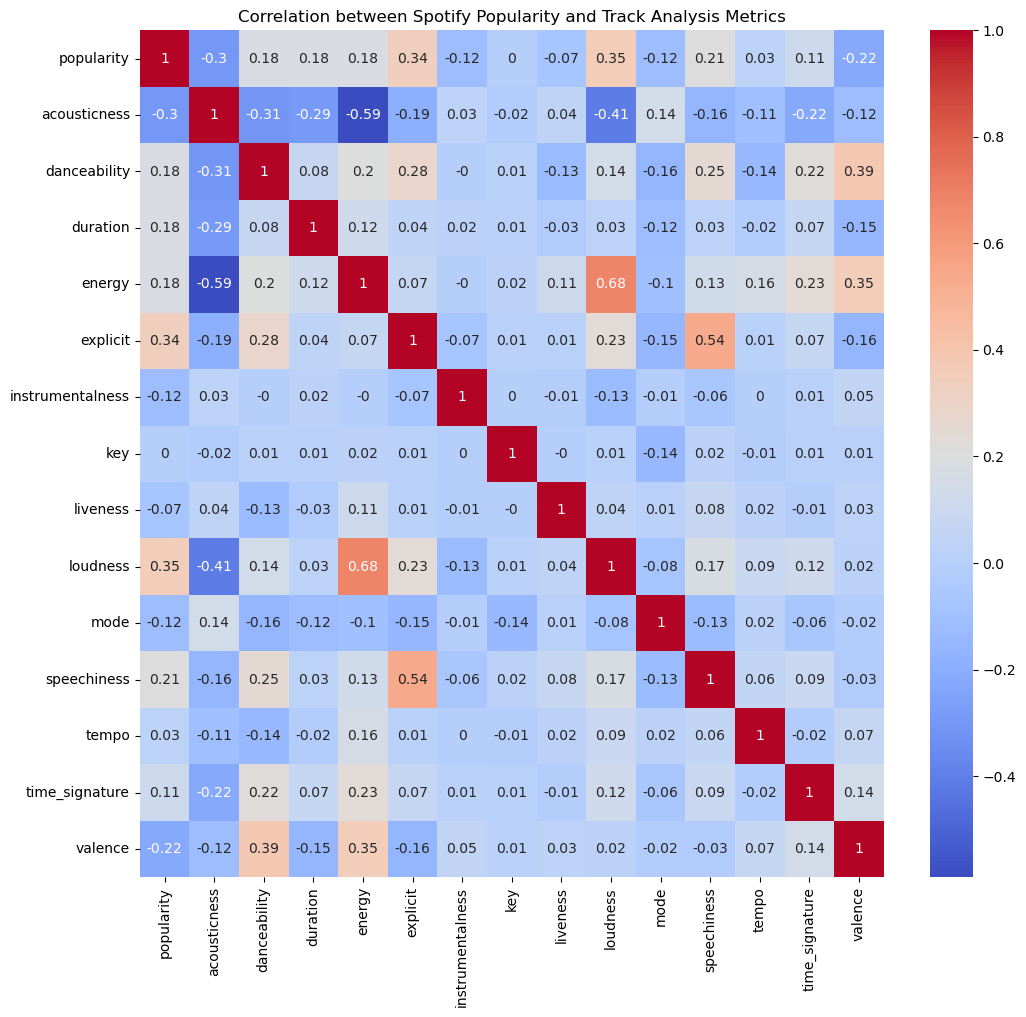

In [9]:
#correlation matrix 2: Spotify Popularity Score and Track Metrics

af_corr2 = af[['spotify_track_popularity',
               'spotify_track_explicit',
               'spotify_track_duration_ms',
               'danceability',
               'energy',
               'key',
               'loudness',
               'mode',
               'speechiness',
               'acousticness',
               'instrumentalness',
               'liveness',
               'valence',
               'tempo',
               'time_signature']].copy()

#rename columns
af_corr2.rename(columns={
    'spotify_track_popularity': 'popularity',
    'spotify_track_explicit': 'explicit',
    'spotify_track_duration_ms': 'duration'
    
}, inplace=True)

#change order for visual
af_corr2_sorted = af_corr2[sorted(af_corr2.columns)] 

#bring popularity score to front
pop = 'popularity'
new_order = [pop] + [i for i in af_corr2_sorted.columns if i != pop]
af_corr2_sorted = af_corr2_sorted[new_order]

corr2 = af_corr2_sorted.corr().round(2)

plt.figure(figsize=(12,11))
sns.heatmap(corr2,annot=True,cmap='coolwarm')
plt.title('Correlation between Spotify Popularity and Track Analysis Metrics')

plt.show()

##Note: remove top half above diagonal

In [78]:
af.head()

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart
0,Solid RockGoanna,Goanna,Solid Rock,"[australian children's music, children's music]",275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,-7.388,0.0,0.0476,0.006990,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7
1,Burning HeartVandenberg,Vandenberg,Burning Heart,[australian children's music],250693.0,False,Vandenberg,0.438,0.546,11.0,-10.331,1.0,0.0419,0.127000,0.00000,0.1820,0.486,125.221,4.0,44.0,39,1983-04-09,14
2,Junk Food JunkieLarry Groce,Larry Groce,Junk Food Junkie,"[children's music, nursery]",196346.0,False,Junk Food Junkie,0.440,0.655,4.0,-8.424,1.0,0.4320,0.627000,0.00000,0.6070,0.899,205.187,4.0,20.0,9,1976-04-17,15
3,Bad DayAlvin And The Chipmunks,Alvin And The Chipmunks,Bad Day,[children's music],214666.0,False,Alvin And The Chipmunks (Original Motion Picture Soundtrack),0.692,0.663,9.0,-3.955,1.0,0.0290,0.176000,0.14200,0.1710,0.315,139.995,4.0,35.0,67,2008-01-19,2
4,FunkytownAlvin And The Chipmunks,Alvin And The Chipmunks,Funkytown,[children's music],214053.0,False,Alvin And The Chipmunks (Original Motion Picture Soundtrack),0.807,0.742,0.0,-7.013,1.0,0.0563,0.000802,0.92900,0.0812,0.285,123.037,4.0,29.0,86,2008-01-19,2


In [53]:
#convert spotify_genre column to list from string safely using the function below for explode function

def safe_literal_eval(s):
    try:
        # Only apply ast.literal_eval if the string starts with '[' and ends with ']'
        if isinstance(s, str) and s.startswith('[') and s.endswith(']'):
            return ast.literal_eval(s)
        return s  # Return the original string if it's not in list format
    except ValueError:
        return s  # Return the original string in case of a ValueError

af['spotify_genre'] = af['spotify_genre'].apply(safe_literal_eval)

In [54]:
#use explode function to get one row per genre per song

af_genre = af.explode('spotify_genre')

af_genre.shape

(132827, 23)

In [84]:
af_genre.head()

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart
0,Solid RockGoanna,Goanna,Solid Rock,australian children's music,275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,-7.388,0.0,0.0476,0.00699,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7
0,Solid RockGoanna,Goanna,Solid Rock,children's music,275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,-7.388,0.0,0.0476,0.00699,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7
1,Burning HeartVandenberg,Vandenberg,Burning Heart,australian children's music,250693.0,False,Vandenberg,0.438,0.546,11.0,-10.331,1.0,0.0419,0.12700,0.00000,0.1820,0.486,125.221,4.0,44.0,39,1983-04-09,14
2,Junk Food JunkieLarry Groce,Larry Groce,Junk Food Junkie,children's music,196346.0,False,Junk Food Junkie,0.440,0.655,4.0,-8.424,1.0,0.4320,0.62700,0.00000,0.6070,0.899,205.187,4.0,20.0,9,1976-04-17,15
2,Junk Food JunkieLarry Groce,Larry Groce,Junk Food Junkie,nursery,196346.0,False,Junk Food Junkie,0.440,0.655,4.0,-8.424,1.0,0.4320,0.62700,0.00000,0.6070,0.899,205.187,4.0,20.0,9,1976-04-17,15


In [89]:
# Use function below to categorize top 10 genres in dataset
def categorize_genre(genre):
    genre = str(genre)
    
    if 'funk' in genre:
        return 'Funk'
    elif 'blues' in genre:
        return 'Blues'
    elif 'dance' in genre:
        return 'Dance'
    elif 'folk' in genre:
        return 'Folk'
    elif 'hip hop' in genre:
        return 'Hip Hop'
    elif 'country' in genre:
        return 'Country'
    elif 'soul' in genre:
        return 'Soul'
    elif 'rap' in genre:
        return 'Rap'
    elif 'pop' in genre:
        return 'Pop'
    elif 'rock' in genre:
        return 'Rock'
    else:
        return None 

In [90]:
af_genre['genre'] = af_genre['spotify_genre'].apply(categorize_genre)

In [91]:
af_genre.head()

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart,genre
0,Solid RockGoanna,Goanna,Solid Rock,australian children's music,275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,-7.388,0.0,0.0476,0.00699,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7,None
0,Solid RockGoanna,Goanna,Solid Rock,children's music,275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,-7.388,0.0,0.0476,0.00699,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7,None
1,Burning HeartVandenberg,Vandenberg,Burning Heart,australian children's music,250693.0,False,Vandenberg,0.438,0.546,11.0,-10.331,1.0,0.0419,0.12700,0.00000,0.1820,0.486,125.221,4.0,44.0,39,1983-04-09,14,None
2,Junk Food JunkieLarry Groce,Larry Groce,Junk Food Junkie,children's music,196346.0,False,Junk Food Junkie,0.440,0.655,4.0,-8.424,1.0,0.4320,0.62700,0.00000,0.6070,0.899,205.187,4.0,20.0,9,1976-04-17,15,None
2,Junk Food JunkieLarry Groce,Larry Groce,Junk Food Junkie,nursery,196346.0,False,Junk Food Junkie,0.440,0.655,4.0,-8.424,1.0,0.4320,0.62700,0.00000,0.6070,0.899,205.187,4.0,20.0,9,1976-04-17,15,None


In [93]:
#remove all songs that didn't fit in to the ten major genre categories

print(af_genre.shape)

af_genre = af_genre.dropna(subset=['genre'])

print(af_genre.shape)

(132827, 24)
(89292, 24)


In [94]:
af_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89292 entries, 20 to 25230
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   song_id                    89292 non-null  object 
 1   performer                  89292 non-null  object 
 2   song                       89292 non-null  object 
 3   spotify_genre              89292 non-null  object 
 4   spotify_track_duration_ms  82139 non-null  float64
 5   spotify_track_explicit     89292 non-null  bool   
 6   spotify_track_album        82114 non-null  object 
 7   danceability               81936 non-null  float64
 8   energy                     81936 non-null  float64
 9   key                        81936 non-null  float64
 10  loudness                   81936 non-null  float64
 11  mode                       81936 non-null  float64
 12  speechiness                81936 non-null  float64
 13  acousticness               81936 non-null  fl

In [96]:
#prep for histogram

af_genre['week_id'] = pd.to_datetime(af_genre['week_id'])

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_12933/2637679217.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


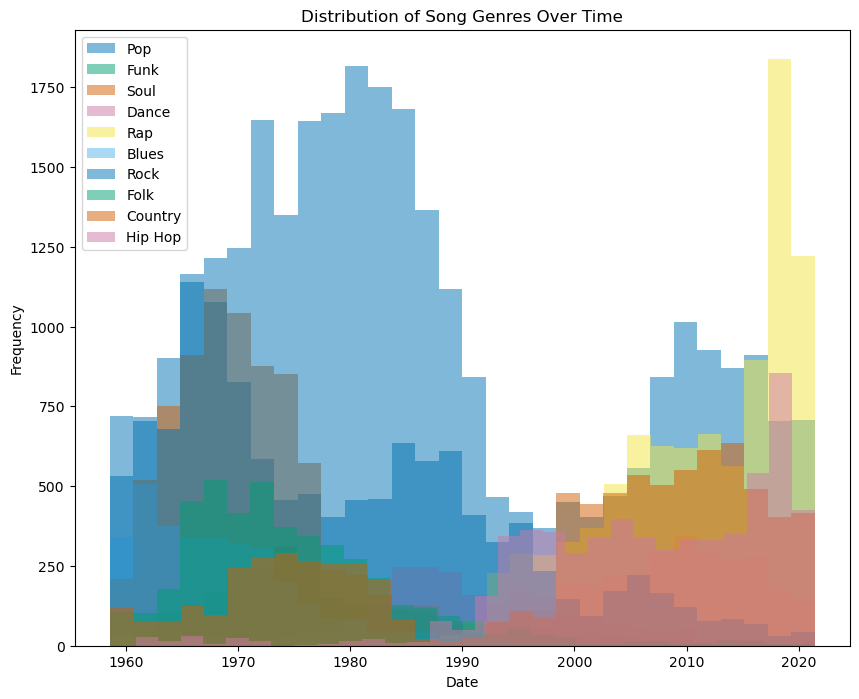

In [103]:
plt.style.use("seaborn-colorblind")

plt.figure(figsize = (10,8))

genres = af_genre['genre'].unique()

for genre in genres:
    subset = af_genre[af_genre['genre'] == genre]
    
    plt.hist(subset['week_id'],bins=30,alpha=0.5,label=genre)
    
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Song Genres Over Time')
plt.legend()

# Show the plot
plt.show()

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_12933/2211273260.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


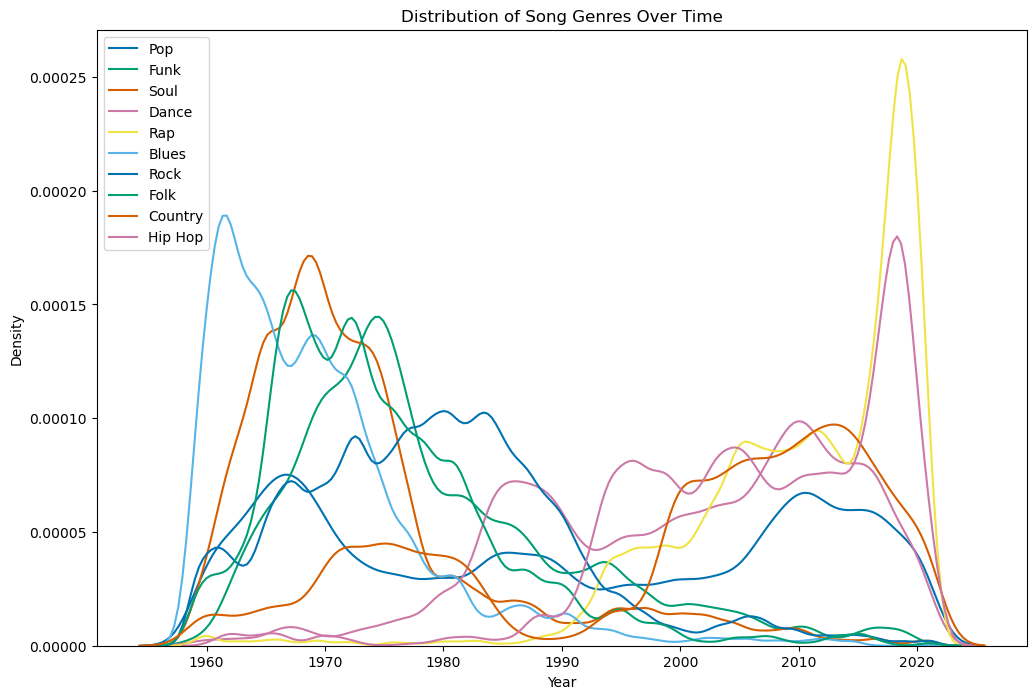

In [109]:
#KDE plot

plt.style.use("seaborn-colorblind")
plt.figure(figsize=(12, 8))

for genre in genres:
    # Filter the DataFrame for the current genre
    subset = af_genre[af_genre['genre'] == genre]

    # Make sure there is enough data to plot
    if not subset.empty:
        # Plot the KDE plot
        sns.kdeplot(subset['week_id'], label=genre, bw_adjust=0.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Distribution of Song Genres Over Time')
plt.legend()

# Show the plot
plt.show()

/var/folders/rb/ss0s8c095cd0p9zyxds3nbcc0000gn/T/ipykernel_12933/127642538.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


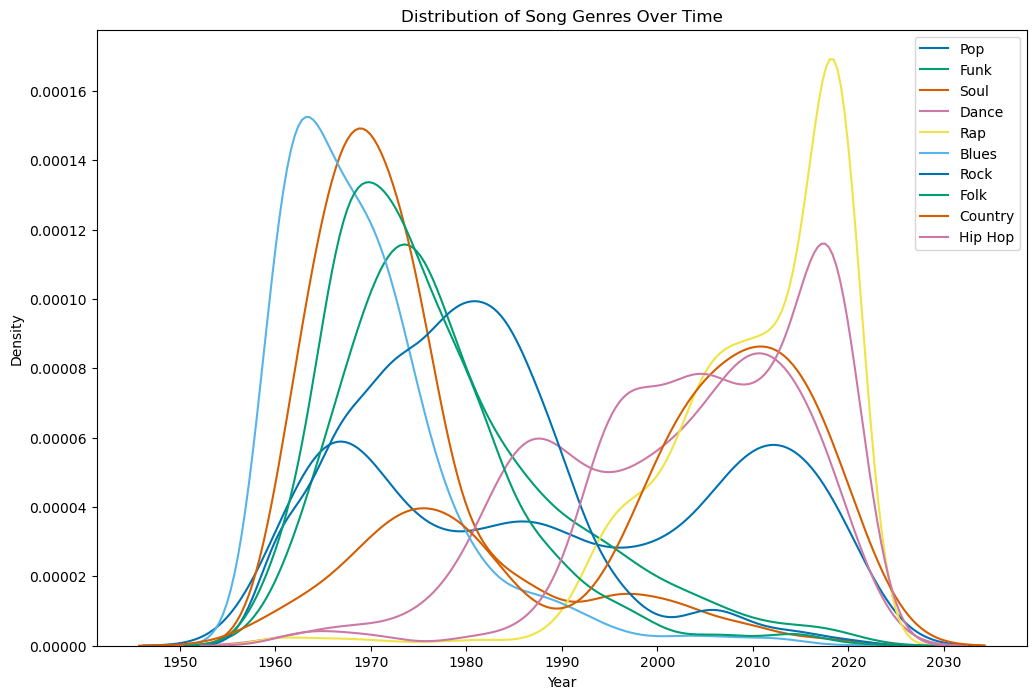

In [110]:
#KDE plot

plt.style.use("seaborn-colorblind")
plt.figure(figsize=(12, 8))

for genre in genres:
    # Filter the DataFrame for the current genre
    subset = af_genre[af_genre['genre'] == genre]

    # Make sure there is enough data to plot
    if not subset.empty:
        # Plot the KDE plot
        sns.kdeplot(subset['week_id'], label=genre, bw_adjust=1.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Distribution of Song Genres Over Time')
plt.legend()

# Show the plot
plt.show()

In [112]:
af_genre.shape

(89292, 24)

In [113]:
af_genre.to_csv('Audio_Features_Exploded.csv')